In [94]:
# importing packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

In [18]:
df1 = pd.read_csv('crop_fertilizer_dataset.csv').drop(['District_Name','Soil_color','Link'],axis=1)
df2 = pd.read_csv('Fertilizer Prediction 100.csv').drop(['Soil Type','Moisture'],axis=1)
df3 = pd.read_csv('fruitand_pulses2.0.csv')

In [73]:
# adding a humidity column in df1 by training a model on df3'Temperature' and df3'Rainfall'

X = df3[['Temperature','Rainfall']]
y = df3['Humidity']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

# randomforest --->
rf_model = RandomForestRegressor(n_estimators=500,max_depth=8,random_state=42,n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluating the model
print("Random Forest:", r2_score(y_test, y_pred_rf))

# xgboost --->
xgb_model = xgb.XGBRegressor(n_estimators=30, learning_rate=0.1, random_state=42,n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
print("XGBoost:", r2_score(y_test, y_pred_xgb))

Random Forest: 0.5550090933398806
XGBoost: 0.5534666413955192


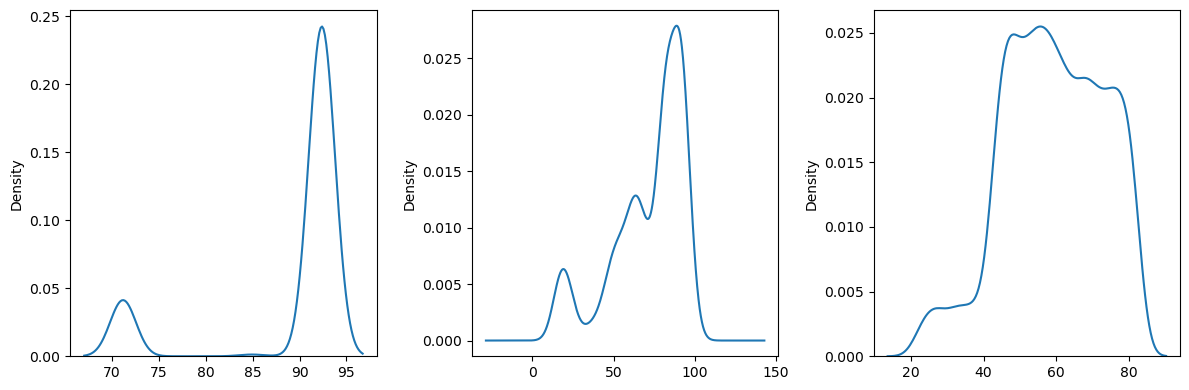

In [100]:
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.kdeplot(x=rf_model.predict(df1[['Rainfall','Temperature']].values))

plt.subplot(132)
df3['Humidity'].plot(kind='kde')

plt.subplot(133)
humidity = rf_model.predict(df1[['Rainfall','Temperature']].values)
sns.kdeplot(humidity - np.random.uniform(10,50,size=(humidity.shape[0],)))

plt.tight_layout()

# humidity column in df1
df1['Humidity'] = humidity - np.random.uniform(10,50,size=(humidity.shape[0],))

In [111]:
df1.columns=['N','P','K','pH','Rain','Temp','Crop','Fertilizer','Humid']
df2.columns=['Temp','Humid','Crop','N','K','P','Fertilizer']
df3.columns=['N','P','K','Temp','Humid','pH','Rain','Crop']

In [121]:
df1 = df1[['N','P','K','pH','Rain','Temp','Humid','Crop','Fertilizer']]
df2 = df2[['N','P','K','Temp','Humid','Crop','Fertilizer']]
df3 = df3[['N','P','K','pH','Rain','Temp','Humid','Crop']]

In [150]:
df2['pH']=[np.nan for _ in range(99)]
df2['Rain']=[np.nan for _ in range(99)]
df2 = df2[['N','P','K','pH','Rain','Temp','Humid','Crop','Fertilizer']]

# concat df1 and df2 
df = pd.concat([df1,df2],axis=0).reset_index(drop=True)

In [154]:
df['pH'] = df['pH'].fillna(df1['pH'].mean())
df['Rain'] = df['Rain'].fillna(df1['Rain'].mean())

In [158]:
df = df.sample(4612).reset_index(drop=True)

In [211]:
df['Crop'] = df['Crop'].str.replace('Ground Nuts','Groundnut')

In [161]:
len(df['Fertilizer'].unique())

24

In [162]:
keys = list(df['Fertilizer'].unique())
values = [i for i in range(24)]

data = dict(zip(keys, values))

df['Fertilizer_class'] = df['Fertilizer'].map(data)
df

,N,P,K,pH,Rain,Temp,Humid,Crop,Fertilizer,Fertilizer_class
0,13,39,0,6.715267,819.18901,33,64.000000,Ground Nuts,DAP,0
1,125,70,55,7.500000,600.00000,25,59.712129,Maize,SSP,1
2,40,40,75,5.500000,1000.00000,35,60.884964,Ginger,Urea,2
3,150,75,70,8.000000,1200.00000,35,59.410322,Sugarcane,MOP,3
4,40,0,0,6.715267,819.18901,28,54.000000,Pulses,Urea,2
...,...,...,...,...,...,...,...,...,...,...
4607,25,45,20,6.500000,600.00000,30,55.560426,Groundnut,Chilated Micronutrient,11
4608,85,55,55,7.000000,700.00000,25,63.328892,Wheat,19:19:19 NPK,6
4609,85,60,55,6.000000,1000.00000,20,79.147060,Rice,Urea,2
4610,90,40,50,7.000000,1400.00000,30,80.874555,Rice,Urea,2


In [183]:
X = df.drop(['Crop','Fertilizer','Fertilizer_class'],axis=1)
y = df['Fertilizer_class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

# randomforest --->
rf_model = RandomForestClassifier(n_estimators=500,max_depth=25,random_state=42,n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Evaluating the model
print("Random Forest:", accuracy_score(y_test, y_pred_rf))

# xgboost --->
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42,n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
print("XGBoost:", accuracy_score(y_test, y_pred_xgb))

Random Forest: 0.9002890173410405
XGBoost: 0.7023121387283237


In [185]:
df3['Fertilizer_class'] = rf_model.predict(df3.drop(['Crop'],axis=1).values)

In [190]:
values = list(df['Fertilizer'].unique())
keys = [i for i in range(24)]

data = dict(zip(keys, values))

df3['Fertilizer'] = df3['Fertilizer_class'].map(data)
df3 = df3[['N','P','K','pH','Rain','Temp','Humid','Crop','Fertilizer','Fertilizer_class']]

In [194]:
df = pd.concat([df,df3],axis=0).sample(6812).reset_index(drop=True)

In [195]:
df.duplicated().sum()

0

In [196]:
df.isnull().sum()

N                   0
P                   0
K                   0
pH                  0
Rain                0
Temp                0
Humid               0
Crop                0
Fertilizer          0
Fertilizer_class    0
dtype: int64

In [208]:
df

,N,P,K,pH,Rain,Temp,Humid,Crop,Fertilizer,Fertilizer_class
0,81,16,45,6.727468,59.759800,26.904357,86.254262,Watermelon,Urea,2
1,145,60,140,6.500000,900.000000,20.000000,68.483590,Sugarcane,DAP,0
2,19,79,19,6.677263,42.895091,20.060040,67.762526,Lentil,Chilated Micronutrient,11
3,25,51,18,9.459493,50.284387,27.777995,54.821308,MothBeans,Chilated Micronutrient,11
4,25,40,15,7.000000,900.000000,30.000000,73.074657,Tur,Urea,2
...,...,...,...,...,...,...,...,...,...,...
6807,95,14,50,6.560444,56.318662,26.633312,84.317568,Watermelon,Magnesium Sulphate,5
6808,97,74,45,5.677720,113.116109,26.475226,78.518338,Banana,Urea,2
6809,50,20,25,6.500000,400.000000,25.000000,79.862274,Moong,Urea,2
6810,45,45,80,6.000000,900.000000,20.000000,76.184529,Ginger,Urea,2


In [212]:
df.to_csv('Fertilizer_Name_Dataset.csv',index=False)

### EDA :

<Axes: xlabel='Crop'>

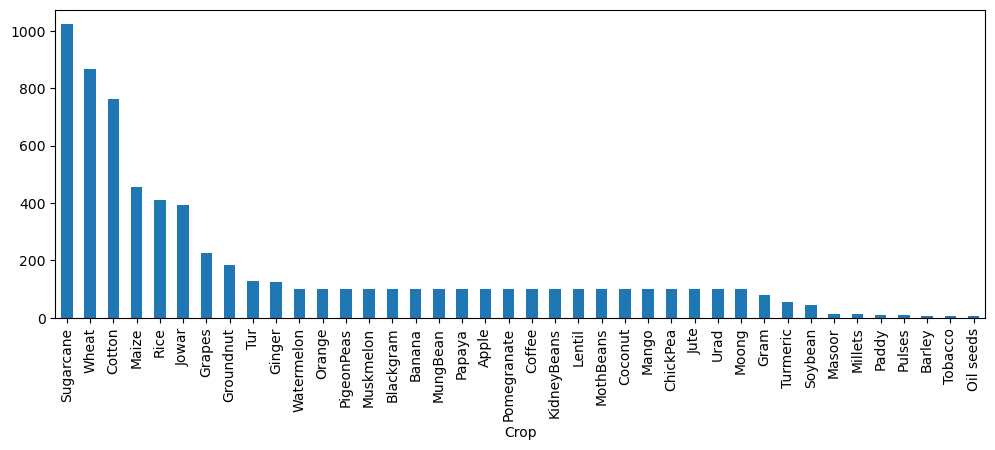

In [213]:
plt.figure(figsize=(12,4))
df['Crop'].value_counts().plot(kind='bar')

<Axes: xlabel='Fertilizer'>

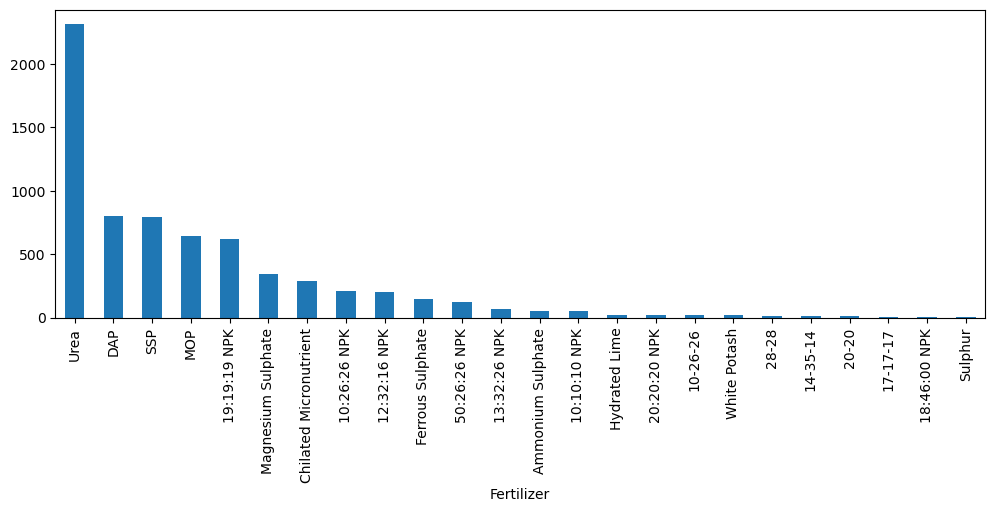

In [205]:
plt.figure(figsize=(12,4))
df['Fertilizer'].value_counts().plot(kind='bar')